# Agrupación de Datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gender = ['Male', 'Female']
income = ['Low', 'Medium', 'High']

### Dummy Dataset, n = 1000

In [4]:
n = 1000
gender_data=[]
income_data=[]
for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [5]:
gender_data[:10]

['Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male']

In [6]:
income_data[:10]

['Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low']

In [7]:
#Normal Distribution 
# mu + sd * Z, Z = Normal Distribution(mu =0, sd =1)
height = np.round(155 + 30 * np.random.randn(n),2)
weight = np.round(65 + 25 * np.random.randn(n), 2)
age = np.rint(30 + 12 * np.random.randn(n)) #.rint rounds to nearest integer
income_amount = np.round(18000 + 3500 * np.random.randn(n),3)


In [8]:
data = pd.DataFrame({
    'Gender': gender_data,
    'Age': age,
    'Height': height,
    'Weight': weight,
    'Income Level': income_data,
    'Income': income_amount
})
data.head(15)

,Gender,Age,Height,Weight,Income Level,Income
0,Male,33.0,168.11,67.09,Low,21882.671
1,Female,39.0,152.21,91.68,Low,16381.230
2,Female,25.0,202.25,38.46,High,15342.492
3,Male,32.0,97.90,88.14,Low,15521.531
4,Female,21.0,156.06,22.12,Low,13596.570
5,Male,42.0,118.88,77.82,Low,17440.970
6,Male,29.0,162.01,41.58,Low,17791.010
7,Female,33.0,138.42,30.97,Low,22234.975
8,Male,1.0,164.23,61.42,Medium,20821.547
9,Male,42.0,168.99,96.18,Low,17126.246


# Agrupación - método groupby()

In [9]:
groups_gender = data.groupby('Gender')
groups_gender.groups

{'Female': Int64Index([  1,   2,   4,   7,  10,  11,  12,  13,  14,  17,
             ...
             977, 980, 987, 988, 989, 991, 992, 993, 995, 998],
            dtype='int64', length=502),
 'Male': Int64Index([  0,   3,   5,   6,   8,   9,  15,  16,  18,  19,
             ...
             982, 983, 984, 985, 986, 990, 994, 996, 997, 999],
            dtype='int64', length=498)}

In [10]:
for names, groups in groups_gender:
    print(names)
    print(groups)

Female
     Gender   Age  Height  Weight Income Level     Income
1    Female  39.0  152.21   91.68          Low  16381.230
2    Female  25.0  202.25   38.46         High  15342.492
4    Female  21.0  156.06   22.12          Low  13596.570
7    Female  33.0  138.42   30.97          Low  22234.975
10   Female  36.0  171.30   65.09         High  22098.012
..      ...   ...     ...     ...          ...        ...
991  Female  44.0  158.91    2.53         High  23475.012
992  Female  33.0  189.54   98.72         High  19272.604
993  Female  43.0  180.20   48.44       Medium  12050.523
995  Female   7.0  155.35  122.23          Low  18347.912
998  Female  36.0  104.88   96.31          Low  15004.948

[502 rows x 6 columns]
Male
    Gender   Age  Height  Weight Income Level     Income
0     Male  33.0  168.11   67.09          Low  21882.671
3     Male  32.0   97.90   88.14          Low  15521.531
5     Male  42.0  118.88   77.82          Low  17440.970
6     Male  29.0  162.01   41.58        

In [11]:
#Obtener solo una categoría
groups_gender.get_group('Male')

,Gender,Age,Height,Weight,Income Level,Income
0,Male,33.0,168.11,67.09,Low,21882.671
3,Male,32.0,97.90,88.14,Low,15521.531
5,Male,42.0,118.88,77.82,Low,17440.970
6,Male,29.0,162.01,41.58,Low,17791.010
8,Male,1.0,164.23,61.42,Medium,20821.547
...,...,...,...,...,...,...
990,Male,41.0,172.74,103.88,Low,19617.853
994,Male,32.0,117.69,69.22,High,10869.931
996,Male,25.0,164.52,66.04,Medium,15997.809
997,Male,23.0,125.99,89.52,Medium,12090.962


## Agrupación en varias columnas

In [12]:
#Agrupar varias columnas
double_group = data.groupby(['Gender','Income Level'])
double_group.groups

{('Female',
  'High'): Int64Index([  2,  10,  11,  13,  29,  30,  32,  41,  42,  44,
             ...
             938, 942, 944, 949, 953, 970, 974, 989, 991, 992],
            dtype='int64', length=166),
 ('Female',
  'Low'): Int64Index([  1,   4,   7,  12,  17,  21,  22,  35,  37,  53,
             ...
             941, 954, 955, 957, 961, 962, 977, 987, 995, 998],
            dtype='int64', length=163),
 ('Female',
  'Medium'): Int64Index([ 14,  23,  31,  39,  46,  48,  52,  59,  66,  67,
             ...
             943, 963, 965, 968, 971, 972, 973, 980, 988, 993],
            dtype='int64', length=173),
 ('Male',
  'High'): Int64Index([ 19,  20,  25,  50,  51,  55,  57,  58,  60,  65,
             ...
             906, 907, 916, 921, 935, 940, 956, 983, 985, 994],
            dtype='int64', length=170),
 ('Male',
  'Low'): Int64Index([  0,   3,   5,   6,   9,  15,  16,  24,  26,  27,
             ...
             948, 952, 958, 959, 966, 978, 981, 982, 986, 990],
            dt

In [13]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'High')
     Gender   Age  Height  Weight Income Level     Income
2    Female  25.0  202.25   38.46         High  15342.492
10   Female  36.0  171.30   65.09         High  22098.012
11   Female  39.0  179.75   96.30         High  11602.526
13   Female  35.0  105.26  108.27         High  22230.620
29   Female  25.0  167.14   60.81         High  14559.156
..      ...   ...     ...     ...          ...        ...
970  Female  24.0  141.86   69.48         High  16605.453
974  Female  42.0  178.22   46.79         High  19685.566
989  Female  45.0  169.23   84.66         High  19452.084
991  Female  44.0  158.91    2.53         High  23475.012
992  Female  33.0  189.54   98.72         High  19272.604

[166 rows x 6 columns]
('Female', 'Low')
     Gender   Age  Height  Weight Income Level     Income
1    Female  39.0  152.21   91.68          Low  16381.230
4    Female  21.0  156.06   22.12          Low  13596.570
7    Female  33.0  138.42   30.97          Low  22234.975
12   Female

## Operaciones sobre datos agrupados

In [14]:
double_group.sum()

Age    Height    Weight       Income
Gender Income Level                                         
Female High          4754.0  24442.15  10744.89  2951717.011
       Low           5009.0  25434.04  11125.92  2940366.309
       Medium        5287.0  26922.17  11323.93  3168170.965
Male   High          5197.0  25985.06  11036.61  2996188.185
       Low           5089.0  25749.53  11032.56  2896432.996
       Medium        4715.0  24603.59  10404.58  2958065.109

In [15]:
double_group.mean() #distribución normal por lo que la media debe ser muy parecida en la columna

Age      Height     Weight        Income
Gender Income Level                                                
Female High          28.638554  147.241867  64.728253  17781.427777
       Low           30.730061  156.037055  68.257178  18039.057110
       Medium        30.560694  155.619480  65.456243  18313.126965
Male   High          30.570588  152.853294  64.921235  17624.636382
       Low           31.030488  157.009329  67.271707  17661.176805
       Medium        28.750000  150.021890  63.442561  18036.982372

In [16]:
double_group.size() #Numero de elementos

Gender  Income Level
Female  High            166
        Low             163
        Medium          173
Male    High            170
        Low             164
        Medium          164
dtype: int64

In [17]:
double_group.describe()

Age                                                  \
                     count       mean        std   min    25%   50%    75%   
Gender Income Level                                                          
Female High          166.0  28.638554  12.254947 -15.0  20.00  30.0  37.75   
       Low           163.0  30.730061  10.770938  -2.0  23.50  31.0  38.00   
       Medium        173.0  30.560694  12.142711  -1.0  22.00  32.0  39.00   
Male   High          170.0  30.570588  12.613896  -4.0  21.00  31.0  39.00   
       Low           164.0  31.030488  11.495757  -5.0  24.00  32.0  39.00   
       Medium        164.0  28.750000  11.761106  -2.0  20.75  29.0  37.00   

                          Height              ...   Weight         Income  \
                      max  count        mean  ...      75%     max  count   
Gender Income Level                           ...                           
Female High          57.0  166.0  147.241867  ...  81.6750  136.18  166.0   
       Low           57.0  163.0  156.037055  ...  84.3050  148.10  163.0   
       Medium        63.0  173.0  155.619480  ...  81.7200  122.59  173.0   
Male   High          62.0  170.0  152.853294  ...  83.6200  137.35  170.0   
       Low           60.0  164.0  157.009329  ...  84.7925  133.80  164.0   
       Medium        55.0  164.0  150.021890  ...  79.3475  129.38  164.0   

                                                                        \
                             mean          std        min          25%   
Gender Income Level                                                      
Female High          17781.427777  3515.228102   9911.554  15205.42900   
       Low           18039.057110  3428.708670   8836.510  15419.13550   
       Medium        18313.126965  3785.477456  10670.029  15659.46100   
Male   High          17624.636382  3319.908439   9409.744  15006.83250   
       Low           17661.176805  3439.576174   8931.948  15318.32200   
       Medium        18036.982372  3361.969749   9924.098  15623.18625   

                                                         
                            50%          75%        max  
Gender Income Level                                      
Female High          18051.9605  20319.39075  25151.957  
       Low           17996.6590  20835.54750  25603.499  
       Medium        18339.8270  21013.89200  28566.088  
Male   High          17705.8045  20221.26250  24126.362  
       Low           17648.4220  20115.74500  26793.678  
       Medium        18026.1205  20381.03025  28596.315  

[6 rows x 32 columns]

In [18]:
#Se puede interactuar como con cualquier dataframe
grouped_income = double_group['Income']
grouped_income.describe()

count          mean          std        min          25%  \
Gender Income Level                                                             
Female High          166.0  17781.427777  3515.228102   9911.554  15205.42900   
       Low           163.0  18039.057110  3428.708670   8836.510  15419.13550   
       Medium        173.0  18313.126965  3785.477456  10670.029  15659.46100   
Male   High          170.0  17624.636382  3319.908439   9409.744  15006.83250   
       Low           164.0  17661.176805  3439.576174   8931.948  15318.32200   
       Medium        164.0  18036.982372  3361.969749   9924.098  15623.18625   

                            50%          75%        max  
Gender Income Level                                      
Female High          18051.9605  20319.39075  25151.957  
       Low           17996.6590  20835.54750  25603.499  
       Medium        18339.8270  21013.89200  28566.088  
Male   High          17705.8045  20221.26250  24126.362  
       Low           17648.4220  20115.74500  26793.678  
       Medium        18026.1205  20381.03025  28596.315

## Método 'aggregate'
Hacer operaciones sobre varias columnas de un grupo al mismo tiempo

In [19]:
double_group.aggregate({
    'Income': np.sum,
    'Age':np.mean,
    'Height': np.std
})

Income        Age     Height
Gender Income Level                                   
Female High          2951717.011  28.638554  30.149663
       Low           2940366.309  30.730061  29.351093
       Medium        3168170.965  30.560694  29.640378
Male   High          2996188.185  30.570588  30.893529
       Low           2896432.996  31.030488  29.091962
       Medium        2958065.109  28.750000  28.553180

## Función lambda dentro del método aggregate

https://es.wikipedia.org/wiki/Coeficiente_de_variaci%C3%B3n -'Coeficiente de variación'


https://matematicasies.com/Tipificacion-de-la-variable - 'Tipificación de variables'

In [20]:
double_group.aggregate({
    'Age':np.mean,
    'Height': lambda h:np.mean(h)/np.std(h) #tipificación de cada altura 
})

Age    Height
Gender Income Level                     
Female High          28.638554  4.898475
       Low           30.730061  5.332609
       Medium        30.560694  5.265493
Male   High          30.570588  4.962361
       Low           31.030488  5.413530
       Medium        28.750000  5.270214

In [21]:
#Aplicar funciones a todas las variables de una sola vez
double_group.aggregate([np.sum, np.mean, np.std])

Age                          Height              \
                        sum       mean        std       sum        mean   
Gender Income Level                                                       
Female High          4754.0  28.638554  12.254947  24442.15  147.241867   
       Low           5009.0  30.730061  10.770938  25434.04  156.037055   
       Medium        5287.0  30.560694  12.142711  26922.17  155.619480   
Male   High          5197.0  30.570588  12.613896  25985.06  152.853294   
       Low           5089.0  31.030488  11.495757  25749.53  157.009329   
       Medium        4715.0  28.750000  11.761106  24603.59  150.021890   

                                  Weight                             Income  \
                           std       sum       mean        std          sum   
Gender Income Level                                                           
Female High          30.149663  10744.89  64.728253  26.203908  2951717.011   
       Low           29.351093  11125.92  68.257178  25.741426  2940366.309   
       Medium        29.640378  11323.93  65.456243  23.188291  3168170.965   
Male   High          30.893529  11036.61  64.921235  25.605839  2996188.185   
       Low           29.091962  11032.56  67.271707  25.155923  2896432.996   
       Medium        28.553180  10404.58  63.442561  24.499339  2958065.109   

                                                
                             mean          std  
Gender Income Level                             
Female High          17781.427777  3515.228102  
       Low           18039.057110  3428.708670  
       Medium        18313.126965  3785.477456  
Male   High          17624.636382  3319.908439  
       Low           17661.176805  3439.576174  
       Medium        18036.982372  3361.969749

In [22]:
double_group.aggregate([ lambda x:  np.mean(x)/np.std(x) ])

Age    Height    Weight    Income
                     <lambda>  <lambda>  <lambda>  <lambda>
Gender Income Level                                        
Female High          2.343968  4.898475  2.477650  5.073705
       Low           2.861846  5.332609  2.659819  5.277394
       Medium        2.524099  5.265493  2.831008  4.851775
Male   High          2.430724  4.962361  2.542898  5.324455
       Low           2.707567  5.413530  2.682380  5.150422
       Medium        2.451985  5.270214  2.597493  5.381436

## Filtrado de Datos

In [23]:
double_group['Age'].filter(lambda x: x.sum() > 2400)

0      33.0
1      39.0
2      25.0
3      32.0
4      21.0
       ... 
995     7.0
996    25.0
997    23.0
998    36.0
999    27.0
Name: Age, Length: 1000, dtype: float64

## Transformación de variables - método transform()

In [24]:
zscore = lambda x: (x- x.mean())/ x.std() #x representa la columna
double_group.transform(zscore)#se tipifican los datos, es decir se regresa a una normal

,Age,Height,Weight,Income
0,0.171325,0.381572,-0.007223,1.227330
1,0.767801,-0.130389,0.909927,-0.483514
2,-0.296905,1.824502,-1.002456,-0.693820
3,0.084337,-2.031810,0.829558,-0.622067
4,-0.903362,0.000782,-1.792332,-1.295674
...,...,...,...,...
995,-2.203156,-0.023408,2.096730,0.090079
996,-0.318848,0.507758,0.106021,-0.606541
997,-0.488900,-0.841654,1.064414,-1.768612
998,0.489274,-1.742935,1.089793,-0.884913


(array([  4.,  10.,  33., 108., 154., 241., 236., 153.,  41.,  20.]),
 array([-3.56089305, -2.93765329, -2.31441354, -1.69117378, -1.06793402,
        -0.44469427,  0.17854549,  0.80178524,  1.425025  ,  2.04826475,
         2.67150451]),
 <a list of 10 Patch objects>)

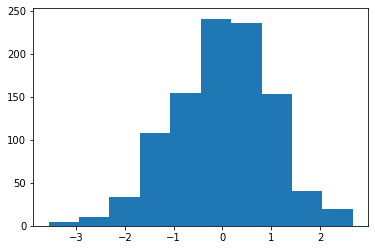

In [25]:
zgroup = double_group.transform(zscore)
plt.hist(zgroup['Age'])

### Rellenar NA´s con transform()

In [26]:
fill_na_with_mean = lambda x: x.fillna(x.mean())

double_group['Age'].transform(fill_na_with_mean) #double_group.transform(fill_na_with_mean) <- si es todo el dataframe

0      33.0
1      39.0
2      25.0
3      32.0
4      21.0
       ... 
995     7.0
996    25.0
997    23.0
998    36.0
999    27.0
Name: Age, Length: 1000, dtype: float64

## Otras operaciones útiles

* Seleccionar fila específica dentro de un grupo

In [31]:
double_group.head(1) #primera fila de cada grupo

,Gender,Age,Height,Weight,Income Level,Income
0,Male,33.0,168.11,67.09,Low,21882.671
1,Female,39.0,152.21,91.68,Low,16381.230
2,Female,25.0,202.25,38.46,High,15342.492
8,Male,1.0,164.23,61.42,Medium,20821.547
14,Female,45.0,135.79,33.79,Medium,15314.504
19,Male,62.0,165.13,46.19,High,20255.406


In [32]:
double_group.tail(1) #ultima fila de cada grupo

,Gender,Age,Height,Weight,Income Level,Income
990,Male,41.0,172.74,103.88,Low,19617.853
992,Female,33.0,189.54,98.72,High,19272.604
993,Female,43.0,180.20,48.44,Medium,12050.523
994,Male,32.0,117.69,69.22,High,10869.931
998,Female,36.0,104.88,96.31,Low,15004.948
999,Male,27.0,117.32,78.60,Medium,18472.077


In [36]:
double_group['Income'].nth(3)

Gender  Income Level
Female  High            22230.620
        Low             18133.252
        Medium          23523.217
Male    High            22697.190
        Low             17791.010
        Medium          17412.925
Name: Income, dtype: float64

In [37]:
double_group.nth(32)

Age  Height  Weight     Income
Gender Income Level                                 
Female High           1.0  132.33   16.55  11900.467
       Low           17.0  113.31   34.42  16927.117
       Medium        18.0  150.18   69.98  18854.607
Male   High          36.0  124.36   49.82  16673.128
       Low           35.0  148.08    9.78  13843.468
       Medium        45.0  181.40   65.77  24335.488

In [39]:
data_sorted = data.sort_values(['Age', 'Income']) #Ordenar en base a ambos
data_sorted.head(10)

,Gender,Age,Height,Weight,Income Level,Income
848,Female,-15.0,90.14,75.30,High,21512.111
464,Male,-5.0,187.98,59.81,Low,14798.637
683,Male,-4.0,238.17,54.04,High,10106.774
893,Female,-2.0,101.13,50.07,High,16167.699
12,Female,-2.0,195.46,22.27,Low,18133.252
875,Male,-2.0,144.33,73.51,Medium,20607.246
693,Male,-1.0,167.38,16.55,High,14920.160
873,Female,-1.0,179.38,72.99,Medium,15096.886
201,Female,-1.0,202.28,65.64,Medium,15825.111
714,Female,-1.0,129.78,96.04,Low,19268.344


In [41]:
age_grouped = data_sorted.groupby('Gender') #Sorteado por edades, pero agrupado por género
age_grouped.head(1) #Hombre y mujer más jóvenes

,Gender,Age,Height,Weight,Income Level,Income
848,Female,-15.0,90.14,75.30,High,21512.111
464,Male,-5.0,187.98,59.81,Low,14798.637


In [43]:
age_grouped.tail(1) #Hombre y mujer más viejos

,Gender,Age,Height,Weight,Income Level,Income
19,Male,62.0,165.13,46.19,High,20255.406
370,Female,63.0,201.06,108.26,Medium,21351.855
